In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [2]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y 추출
# 맨 끝이 Outcome 컬럼으로 레이블 값임. 칼럼 위치 -1을 이용해 추출
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=28, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

def get_clf_eval(y_test,pred=None, pred_proba=None):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('Confusion Matrix')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f},재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy,precision,recall,f1,roc_auc))

get_clf_eval(y_test,pred, pred_proba)

Confusion Matrix
[[90 10]
 [26 28]]
정확도: 0.7662, 정밀도: 0.7368,재현율: 0.5185, F1: 0.6087, AUC:0.8163


#### 전체 데이터 중 Negative가 65% 이므로 재현율 성능에 조금 더 초점을 맞춰줌

In [12]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary  = thresholds.shape[0]
    plt.plot(thresholds, precisions[:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[:threshold_boundary], label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value');plt.ylabel('Precision and Recall value')
    plt.legend();plt.grid()
    plt.show()

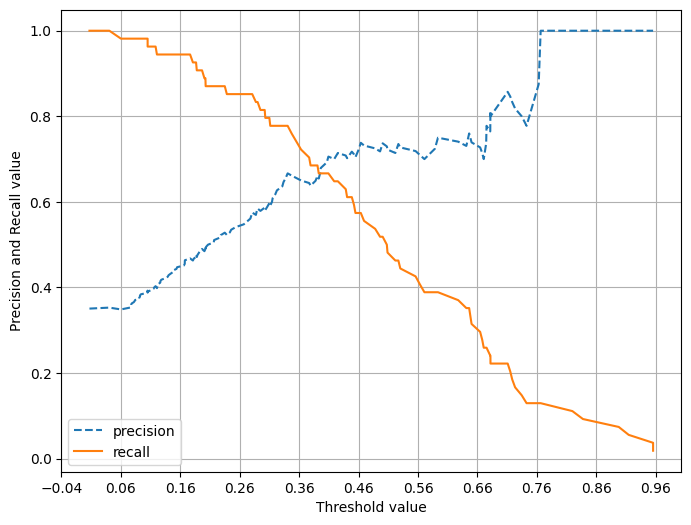

In [13]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test,pred_proba_c1)

두 값 모두 0.7이 안되는 곳에서 만나기 때문에 다시 데이터 값 점검

In [14]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


min값이 0으로 나와있는 컬럼이 많이 보임.\
Glucose 같은 경우 포도당 수치인데 0인 것은 말이 안됨

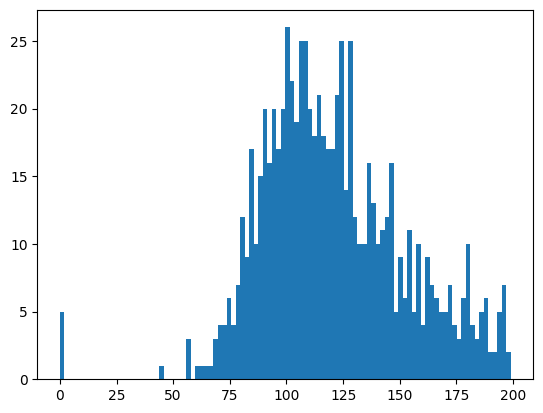

In [15]:
plt.hist(diabetes_data['Glucose'], bins=100)
plt.show()

0값만 따로 떨어져 있는 것을 확인할 수 있음

In [18]:
# 0값을 검사할 피처명 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# 피처별로 반복하면서 데이터 ㄱ밧이 0인 데이터 건수를 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature]==0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.70%
BMI 0 건수는 11, 퍼센트는 1.43%


0 값인 데이터 갯수가 굉장히 많은 컬럼이 보임.\
일괄적으로 삭제할 경우 학습이 잘 진행되지 않을 수 있음\
따라서, 평균값으로 대체함

In [19]:
# zero_feature 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features]=diabetes_data[zero_features].replace(0, mean_zero_features)

In [20]:
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=28)

# 로지스틱 회귀로 학습, 예측 및 평가 수행.
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

Confusion Matrix
[[93 10]
 [20 31]]
정확도: 0.8052, 정밀도: 0.7561,재현율: 0.6078, F1: 0.6739, AUC:0.8709


In [30]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    # threshods list객체 내의 값을차례로 iteration하면서 Evaluation수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict=binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test,custom_predict)
        
def get_clf_eval(y_test,pred=None, pred_proba=None):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('Confusion Matrix')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f},재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy,precision,recall,f1,roc_auc))

In [27]:
thresholds = [0.3, 0.33, 0.36, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.3
Confusion Matrix
[[77 26]
 [ 8 43]]
정확도: 0.7792, 정밀도: 0.6232,재현율: 0.8431, F1: 0.7167
임곗값: 0.33
Confusion Matrix
[[81 22]
 [ 9 42]]
정확도: 0.7987, 정밀도: 0.6562,재현율: 0.8235, F1: 0.7304
임곗값: 0.36
Confusion Matrix
[[85 18]
 [12 39]]
정확도: 0.8052, 정밀도: 0.6842,재현율: 0.7647, F1: 0.7222
임곗값: 0.42
Confusion Matrix
[[91 12]
 [17 34]]
정확도: 0.8117, 정밀도: 0.7391,재현율: 0.6667, F1: 0.7010
임곗값: 0.45
Confusion Matrix
[[92 11]
 [20 31]]
정확도: 0.7987, 정밀도: 0.7381,재현율: 0.6078, F1: 0.6667
임곗값: 0.48
Confusion Matrix
[[93 10]
 [20 31]]
정확도: 0.8052, 정밀도: 0.7561,재현율: 0.6078, F1: 0.6739
임곗값: 0.5
Confusion Matrix
[[93 10]
 [20 31]]
정확도: 0.8052, 정밀도: 0.7561,재현율: 0.6078, F1: 0.6739


In [28]:
# 임계값을 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48) 

In [31]:
# 위에서 구한 lr_crf의 predict_proba() 예측 확률 array에서 1에 해당하는 컬럼값을 Binarizer 변환
pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))

get_clf_eval(y_test, pred_th_048, pred_proba[:, 1])

Confusion Matrix
[[93 10]
 [20 31]]
정확도: 0.8052, 정밀도: 0.7561,재현율: 0.6078, F1: 0.6739, AUC:0.8709
